In [57]:
import requests
from config import api_key
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
%load_ext lab_black

In [3]:
# Get random latitude

lat_list = []
x = 0
while x < 501:
    lat = round(np.random.uniform(-90, 90), 5)
    lat_list.append(lat)
    x += 1

lat_list[:5]

len(lat_list)

51

In [4]:
# Get random longitudes

lon_list = []
y = 0
while y < 501:
    lon = round(np.random.uniform(-180, 180), 5)
    lon_list.append(lon)
    y += 1

lon_list[:5]

len(lon_list)

51

In [5]:
# Combine lat and long into pairs

lat_long_pairs = list(zip(lat_list, lon_list))

lat_long_pairs[:5]

[(4.1742, -161.53353),
 (58.12609, 4.73195),
 (-15.54504, -73.08301),
 (-33.17276, -172.26149),
 (26.98064, -146.9581)]

In [6]:
# # One that works

# url = "https://api.openweathermap.org/data/2.5/weather?id=2172797&appid=api_key"

# r = requests.get(url)

# r.status_code

# data = r.json()
# # data

In [7]:
# # Class Example

# cities_results = []

# for city in cities:

#     data = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
#         "q": city,
#         "appid": api_key
#     }).json()

#     city_result = extract_data(data)

#     cities_results.append(city_result)

In [8]:
# Attempt to mimic class example

cities_results = []

for element in lat_long_pairs:

    data = requests.get(
        "http://api.openweathermap.org/data/2.5/weather",
        params={"lat": element[0], "lon": element[1], "appid": api_key,},
    ).json()

    cities_results.append(data)

In [9]:
# cities_results = []

# for element in lat_long_pairs:
#     print(element[0])

In [39]:
cities_results[:2]
# data

[{'coord': {'lon': -161.53, 'lat': 4.17},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 299.29,
   'feels_like': 300.05,
   'temp_min': 299.29,
   'temp_max': 299.29,
   'pressure': 1011,
   'humidity': 79,
   'sea_level': 1011,
   'grnd_level': 1011},
  'visibility': 10000,
  'wind': {'speed': 5.79, 'deg': 124},
  'clouds': {'all': 70},
  'dt': 1601136407,
  'sys': {'sunrise': 1601224443, 'sunset': 1601267973},
  'timezone': 50400,
  'id': 0,
  'name': '',
  'cod': 200},
 {'coord': {'lon': 4.73, 'lat': 58.13},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 286.98,
   'feels_like': 281.98,
   'temp_min': 286.98,
   'temp_max': 286.98,
   'pressure': 1007,
   'humidity': 76,
   'sea_level': 1007,
   'grnd_level': 1007},
  'visibility': 10000,
  'wind': {'speed': 7.08, 'deg': 10},
  'clouds':

In [22]:
# lat = data["coord"]["lat"]
# lat

lat = []
for i in range(len(cities_results)):
    lat.append(cities_results[i]["coord"]["lat"])

lat[:5]

[4.17, 58.13, -15.55, -33.17, 26.98]

In [12]:
temp_k = []
for i in range(len(cities_results)):
    temp_k.append(cities_results[i]["main"]["temp"])

temp_k[:5]

[299.29, 286.98, 295.63, 289.42, 297.89]

In [49]:
# Convert temp_k to temp_f

# T(K) × 9/5 - 459.67

temp_f = []

for t in range(len(temp_k)):
    f = round((temp_k[t] * (9 / 5) - 459.67), 2)
    temp_f.append(f)

# Check results
print(temp_f[:2])
print(temp_k[:2])

[79.05, 56.89]
[299.29, 286.98]


In [17]:
# cloud_percent = data["clouds"]["all"]
# cloud_percent

cloud_percent = []
for i in range(len(cities_results)):
    cloud_percent.append(cities_results[i]["clouds"]["all"])

cloud_percent[:5]

[70, 55, 0, 0, 0]

In [19]:
# humidity_percent = data["main"]["humidity"]
# humidity_percent

humidity_percent = []
for i in range(len(cities_results)):
    humidity_percent.append(cities_results[i]["main"]["humidity"])

humidity_percent[:5]

[79, 76, 20, 90, 77]

In [18]:
# wind_speed_meters_sec = data["wind"]["speed"]
# wind_speed_meters_sec

wind_speed_meters_sec = []
for i in range(len(cities_results)):
    wind_speed_meters_sec.append(cities_results[i]["wind"]["speed"])

wind_speed_meters_sec[:5]

[5.79, 7.08, 4.58, 0.29, 6.7]

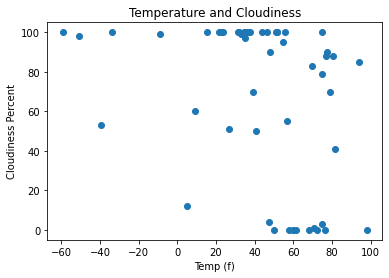

In [50]:
# Scatter plot for temp and cloudiness
fig, ax1 = plt.subplots()
ax1.set_title("Temperature and Cloudiness")
plt.xlabel("Temp (f)")
plt.ylabel("Cloudiness Percent")

plt.scatter(temp_f, cloud_percent)

plt.show()

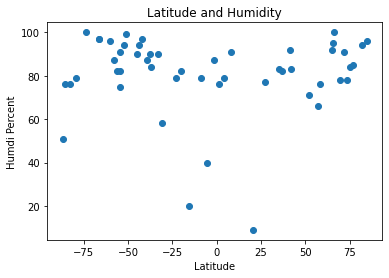

In [34]:
# Scatter plot for humidity and latitude
fig, ax2 = plt.subplots()
ax2.set_title("Latitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humdi Percent")

plt.scatter(lat, humidity_percent)
plt.show()

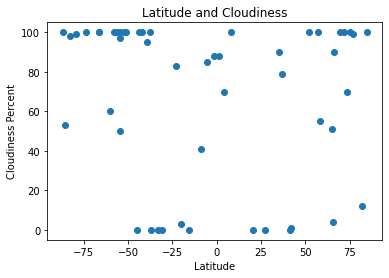

In [31]:
# Scatter plot for cloudiness and latitude
fig, ax3 = plt.subplots()
ax3.set_title("Latitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Percent")

plt.scatter(lat, cloud_percent)
plt.show()

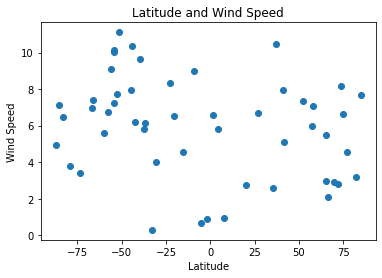

In [35]:
# Scatter plot for wind speed and latitude
fig, ax4 = plt.subplots()
ax4.set_title("Latitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(lat, wind_speed_meters_sec)
plt.show()

In [38]:
# Divide out the latitudes into northern or southern hemsipheres

# north_lat = []
# south_lat = []

# # add latitudes to proper list

# for lat in lat_list:
#     if lat >= 0:
#         north_lat.append(lat)
#     else:
#         south_lat.append(lat)

# print(f"The northern latitudes are: {north_lat}")
# print(f"The southern latitudes are: {south_lat}")

The northern latitudes are: [4.1742, 58.12609, 26.98064, 52.23581, 64.91921, 20.1638, 69.43347, 41.75281, 82.03765, 41.09889, 35.06191, 7.78385, 1.36539, 57.11324, 66.2262, 75.05546, 65.40279, 71.74564, 76.97088, 73.57247, 84.67397, 36.92309]
The souther latitudes are: [-15.54504, -33.17276, -39.44825, -56.03409, -5.40918, -51.34949, -44.1246, -30.76448, -42.25349, -82.99074, -57.70931, -66.60088, -20.39565, -60.17452, -37.43352, -54.47001, -73.51608, -85.41397, -54.40453, -52.53941, -54.28384, -1.6799, -86.9594, -37.03403, -9.1601, -22.71663, -79.20205, -44.77094, -66.45605]


In [59]:
# Create a DataFrame from my lists

df = pd.DataFrame(
    {
        "latitude": lat_list,
        "longitude": lon_list,
        "temp_f": temp_f,
        "wind_speed_meters_sec": wind_speed_meters_sec,
        "cloudiness": cloud_percent,
        "humidity": humidity_percent,
    }
)

df.head()

,latitude,longitude,temp_f,wind_speed_meters_sec,cloudiness,humidity
0,4.17420,-161.53353,79.05,5.79,70,79
1,58.12609,4.73195,56.89,7.08,55,76
2,-15.54504,-73.08301,72.46,4.58,0,20
3,-33.17276,-172.26149,61.29,0.29,0,90
4,26.98064,-146.95810,76.53,6.70,0,77


In [60]:
# Add a column for northern or southern hemisphere

df["hemisphere"] = np.where(df["latitude"] >= 0, "Northern", "Southern")

df.head()

,latitude,longitude,temp_f,wind_speed_meters_sec,cloudiness,humidity,hemisphere
0,4.17420,-161.53353,79.05,5.79,70,79,Northern
1,58.12609,4.73195,56.89,7.08,55,76,Northern
2,-15.54504,-73.08301,72.46,4.58,0,20,Southern
3,-33.17276,-172.26149,61.29,0.29,0,90,Southern
4,26.98064,-146.95810,76.53,6.70,0,77,Northern


In [71]:
# Create a df for nothern hemisphere

north = df[df["hemisphere"] == "Northern"]
nor
th.head()
print(len(north))

In [74]:
# Create a df for southern hemisphere

south = df[df["hemisphere"] == "Southern"]
south.head()
print(len(south))

29


<function matplotlib.pyplot.show(close=None, block=None)>

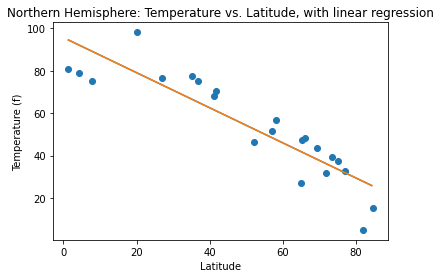

In [77]:
# Linear Regression: Northern Hemisphere - Temperature vs. Latitude

model = LinearRegression()

X = [[l] for l in north["latitude"]]
y = [[t] for t in north["temp_f"]]

# print(len(X))
# print(len(y))

model.fit(X, y)

coef = model.coef_
# print(f"The correlation coefficient is {coef}")
intercept = model.intercept_


def predict_function(vol):
    return model.predict([[vol]])[0]


predict_x = np.arange(min(north_lat), max(north_lat))
predict_y = [predict_function(e) for e in predict_x]


fig, ax5 = plt.subplots()
ax5.set_title("Northern Hemisphere: Temperature vs. Latitude, with linear regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")

plt.scatter(X, y)

plt.plot(predict_x, predict_y)
plt.plot(predict_x, predict_y)
plt.show

In [ ]:
# Linear Regression: Southern Hemisphere - Temperature (F) vs. Latitude

In [ ]:
# Linear Regression: Northern Hemisphere - Humidity (%) vs. Latitude

In [ ]:
# Linear Regression: Southern Hemisphere - Humidity (%) vs. Latitude

In [ ]:
# Linear Regression: Northern Hemisphere - Cloudiness (%) vs. Latitude

In [ ]:
# Linear Regression: Southern Hemisphere - Cloudiness (%) vs. Latitude

In [ ]:
# Linear Regression: Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
# Linear Regression: Southern Hemisphere - Wind Speed (mph) vs. Latitude